In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Đường dẫn tới tệp zip trong Google Drive
dataset_path = '/content/drive/MyDrive/archive.zip'

# Đường dẫn để giải nén tệp
extract_path = '/content/dataset/'

# Giải nén tệp
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset đã được giải nén vào {extract_path}")


Dataset đã được giải nén vào /content/dataset/


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import os
import zipfile

# Text processing and classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
)

# Plotting
import matplotlib.pyplot as plt

# Image processing
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    TerminateOnNaN,
    LearningRateScheduler,
    CSVLogger,
    TensorBoard,
    ReduceLROnPlateau,
    EarlyStopping,
)
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
import os
import shutil
import random

# Define the base dataset directory and the target directory
base_dir = "/content/dataset/Comprehensive Disaster Dataset(CDD)/"
target_dir = "/content/working/"

# Create target directories for train, val, and test
os.makedirs(os.path.join(target_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(target_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(target_dir, 'test'), exist_ok=True)

# Set the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure that the ratios add up to 1
assert train_ratio + val_ratio + test_ratio == 1, "Ratios must sum to 1"

# Loop through each class directory
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    if os.path.isdir(class_path):  # Check if it is a directory
        # Get a list of all images in the class directory
        images = os.listdir(class_path)
        random.shuffle(images)  # Shuffle the images for randomness

        # Calculate the number of images for each split
        total_images = len(images)
        train_count = int(total_images * train_ratio)
        val_count = int(total_images * val_ratio)

        # Split images into train, val, and test
        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Create class directories in target directories
        os.makedirs(os.path.join(target_dir, 'train', class_name), exist_ok=True)
        os.makedirs(os.path.join(target_dir, 'val', class_name), exist_ok=True)
        os.makedirs(os.path.join(target_dir, 'test', class_name), exist_ok=True)

        # Move the images to the corresponding directories
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(target_dir, 'train', class_name, image))

        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(target_dir, 'val', class_name, image))

        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(target_dir, 'test', class_name, image))

print("Dataset has been split into train, val, and test sets.")

Dataset has been split into train, val, and test sets.


In [ ]:

train_dir = '/content/working/train/'
val_dir = '/content/working/val/'
test_dir = '/content/working/test/'

def check_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()  # Verify if the image is valid
            except Exception as e:
                os.remove(img_path)
                print(f"Corrupted image: {img_path}, Error: {e}")

check_images(train_dir)  # Check your train directory
check_images(val_dir)    # Check your validation directory
check_images(test_dir)   # Check your test directory
print("CHECK DONE")

Corrupted image: /content/working/train/Human_Damage/02_0069.png, Error: cannot identify image file '/content/working/train/Human_Damage/02_0069.png'
CHECK DONE


Found 9485 images belonging to 6 classes.
Found 2031 images belonging to 6 classes.
Found 2040 images belonging to 6 classes.
Epoch 1/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 120s 366ms/step - accuracy: 0.6729 - loss: 0.9828 - val_accuracy: 0.7892 - val_loss: 0.6156 - learning_rate: 0.0010
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7188 - loss: 0.5846 - val_accuracy: 0.9333 - val_loss: 0.4401 - learning_rate: 0.0010
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 123s 347ms/step - accuracy: 0.7736 - loss: 0.6428 - val_accuracy: 0.7922 - val_loss: 0.5876 - learning_rate: 0.0010
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.8125 - loss: 0.7109 - val_accuracy: 0.8000 - val_loss: 0.5128 - learning_rate: 0.0010
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 104s 347ms/step - accuracy: 0.7918 - loss: 0.5934 - val_accuracy: 0.8155 - val_loss: 0.5275 - learning_rate: 0.0010
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.8538 - val_accurac

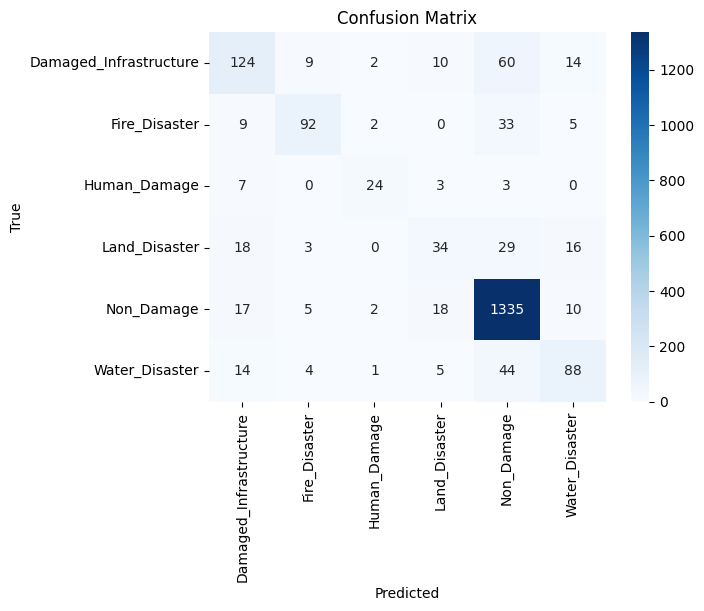

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix

# Set paths for training, validation, and test data
train_dir = '/content/working/train/'
val_dir = '/content/working/val/'
test_dir = '/content/working/test/'

# Image dimensions and other parameters
img_height, img_width = 150, 150  # You can adjust this based on your needs
batch_size = 32

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],  # Adjust brightness
    channel_shift_range=20.0,  # Adjust color channels
)

# Data preparation for validation and test sets
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

# Transfer Learning - Load a pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Build the model using the pre-trained base model + custom classifier
model = tf.keras.models.Sequential([
    base_model,  # Pre-trained VGG16 model
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.1 ** (epoch // 5))  # Reduce LR every 5 epochs

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=-1)
true_classes = test_generator.classes

# Classification report and confusion matrix
print(classification_report(true_classes, predicted_classes))
print(confusion_matrix(true_classes, predicted_classes))

# Optionally, visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('/content/working/my_final_model.keras')  # Save as .keras format


In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình đã huấn luyện
model = load_model('/content/working/my_final_model.keras')

# Kiểm tra mô hình đã tải thành công
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,914,004 (56.89 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 132,878 (519.06 KB)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Đường dẫn đến hình ảnh cần dự đoán
img_path = '/content/working/train/Damaged_Infrastructure/05_01_0033.png'  # Hoặc từ URL

# Tải và xử lý hình ảnh
img = image.load_img(img_path, target_size=(150, 150))  # Thay đổi kích thước hình ảnh về 150x150
img_array = image.img_to_array(img)  # Chuyển đổi hình ảnh thành mảng numpy
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch (trở thành [1, 150, 150, 3])
img_array = img_array / 255.0  # Chuẩn hóa lại giá trị pixel về dải [0, 1] nếu mô hình được huấn luyện theo cách này

# Dự đoán
predictions = model.predict(img_array,batch_size=128)

# Lấy lớp dự đoán với xác suất cao nhất
predicted_class_index = np.argmax(predictions, axis=1)

# Lấy tên lớp tương ứng với chỉ số lớp
class_names = list(train_generator.class_indices.keys())  # Lấy tên các lớp từ class_indices
predicted_class_name = class_names[predicted_class_index[0]]  # Tìm tên lớp dự đoán

# In ra lớp dự đoán và tên lớp
print(f'Dự đoán lớp: {predicted_class_index[0]} - {predicted_class_name}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Dự đoán lớp: 0 - Damaged_Infrastructure
